In [1]:
%tensorflow_version 1.x
# pip install filterpy

TensorFlow 1.x selected.


## Descargamos el modelo de YOLO y los pesos de la version 2

In [2]:
!git clone https://github.com/thtrieu/darkflow.git
%cd darkflow
!python setup.py build_ext --inplace
!pip install -e .
!pip install .
!mkdir bin
!wget  https://pjreddie.com/media/files/yolov2.weights -O bin/yolov2.weights
cd ..

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 8.28 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.


In [64]:
cd ..

/content


In [65]:
!git clone https://gitlab.com/IsRaTiAl/v4c.git
!cp v4c/notebooks/sort.py darkflow/sort.py
!cp -r v4c/videos/test darkflow/test_videos

Cloning into 'v4c'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 118 (delta 44), reused 81 (delta 25), pack-reused 0
Receiving objects: 100% (118/118), 153.28 MiB | 13.68 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [0]:
%cd darkflow/
!mkdir test_videos/crowd
!mkdir test_videos/uncrowd
!unrar e test_videos/crowd_day_back.rar test_videos/crowd
!unrar e test_videos/uncrowd_day_back.rar test_videos/uncrowd

In [0]:
# !python flow --model cfg/yolo.cfg --load bin/yolov2.weights --demo 2015_05_08_08_27_20BackColor.avi --gpu 1.0 --saveVideo

In [83]:
from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt
import numpy as np


options = {"model": "cfg/yolo.cfg", "load": "bin/yolov2.weights", "threshold": 0.30, 'gpu':1}

tfnet = TFNet(options)

# imgcv = cv2.imread("f2.jpg")
# result = tfnet.return_predict(imgcv)
# print(result)

/usr/local/lib/python3.6/dist-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.02212691307067871s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [0]:
def bounding_box(imgcv, result):  
  img = imgcv.copy()
  for res in result:
    tl = (res['topleft']['x'],res['topleft']['y'])
    br = (res['bottomright']['x'],res['bottomright']['y'])
    img = cv2.rectangle(img,tl,br,(0,255,0),2)
    img = cv2.putText(img,res['label'],tl, cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
    print(res['confidence'])
    img = cv2.putText(img,str(round(100*res['confidence'],2)),(res['topleft']['x'],res['topleft']['y']+10), cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
    cv2.rectangle(imgcv,(_x1,_y1),(_x2,_y2),(0,255,0),cv2.FILLED)
    cv2.putText(imgcv,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
  return img

In [0]:
def bounbox(imgcv, box):
  for box in result:
    if(box['label']=='person'):
      x1,y1,x2,y2 = box['topleft']['x'],box['topleft']['y'],box['bottomright']['x'],box['bottomright']['y']
      cx, cy = x1+int((x2-x1)/2), y1+int((y2-y1)/2)
      conf = box['confidence']
      # print(conf)
      label = box['label']
      # print(x1,y1,x2,y2,conf,label)
      cv2.rectangle(imgcv,(x1,y1),(x2,y2),(0,255,0),2)
      labelSize=cv2.getTextSize(label,cv2.FONT_HERSHEY_COMPLEX,0.5,1)
      confSize=cv2.getTextSize(label,cv2.FONT_HERSHEY_COMPLEX,0.5,1)
      # print('labelSize>>',labelSize)
      _x1 = x1
      _y1 = y1#+int(labelSize[0][1]/2)
      _x2 = _x1+labelSize[0][0]
      _y2 = y1-int(labelSize[0][1])
      cv2.rectangle(imgcv,(_x1,_y1),(_x2,_y2),(0,255,0),cv2.FILLED)
      cv2.putText(imgcv,label,(x1,y1),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
      cv2.rectangle(imgcv,(_x1,_y1+14),(_x2,_y2+14),(0,255,0),cv2.FILLED)
      cv2.putText(imgcv,str(round(conf,2)),(x1,y1+14),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
      cv2.circle(imgcv,(cx,cy), 5, (0,0,255), -1)
  return imgcv

In [88]:
track_bbs_ids

array([[148.19792717, 145.38718722, 300.83709075, 239.33898053,
        693.        ],
       [154.2905915 ,  33.19081415, 195.7023437 , 127.54791394,
        692.        ],
       [ 35.73656513,  57.59037037, 179.98234103, 228.15893454,
        681.        ]])

In [0]:
line = [(0, 90), (320, 90)]

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(200, 3),	dtype="uint8")
# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
	return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)
def ccw(A,B,C):
  # pri/nt((C[1]-A[1]) * (B[0]-A[0]))
  return (C[1]-A[1]) * (B[0]-A[0])> (B[1]-A[1]) * (C[0]-A[0])

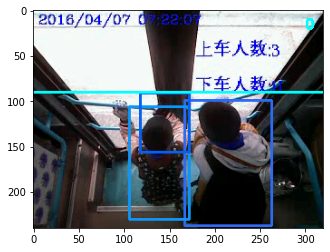

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


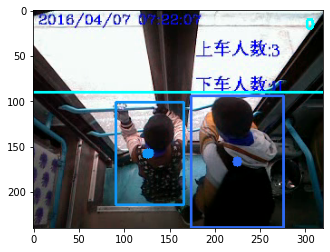

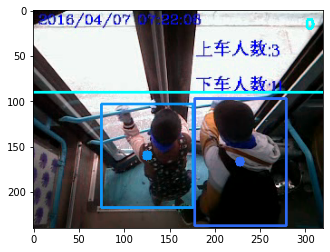

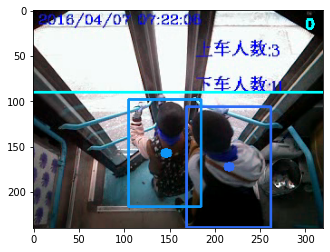

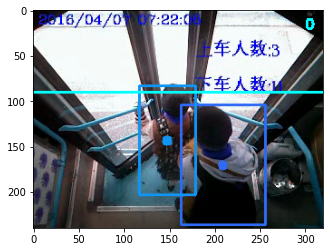

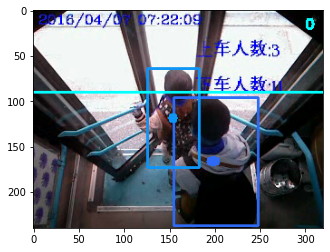

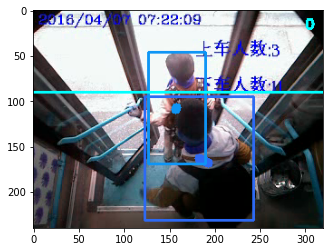

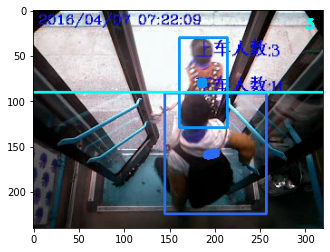

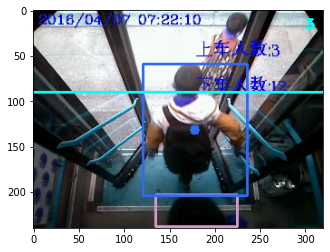

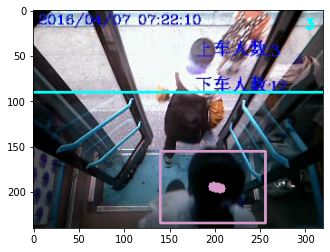

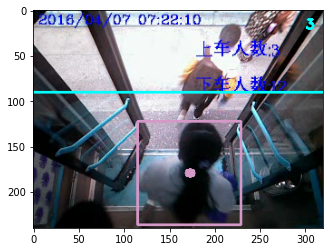

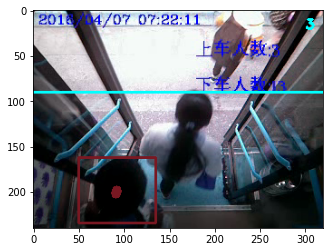

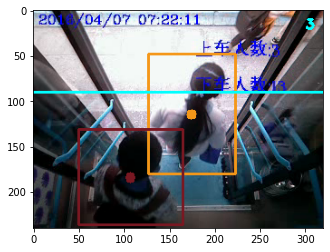

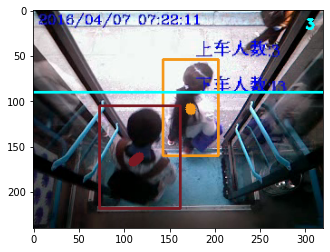

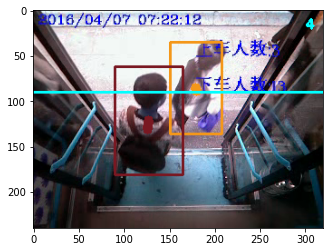

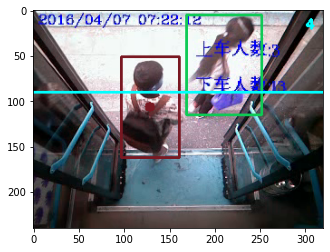

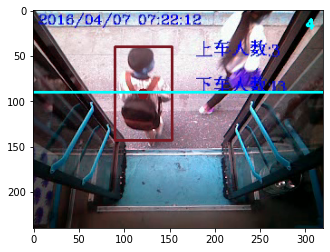

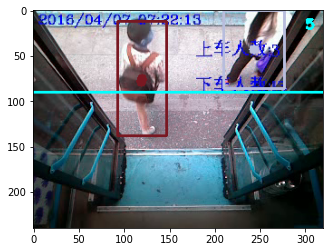

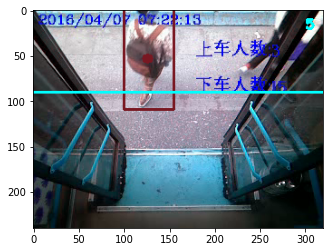

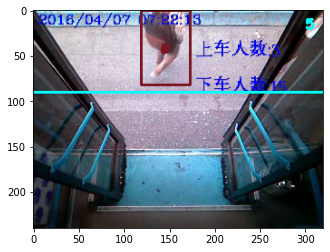

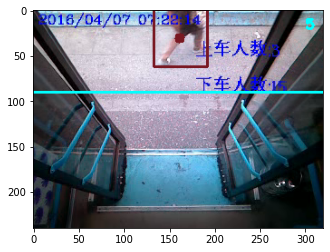

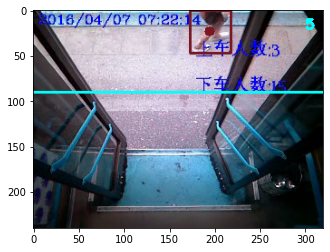

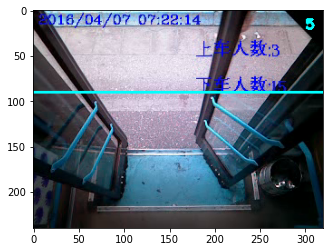

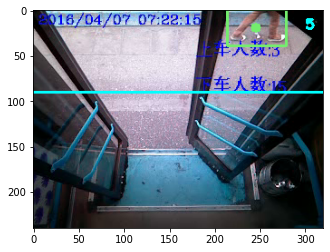

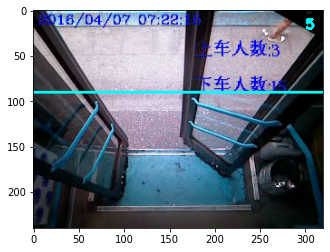

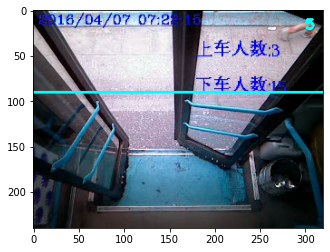

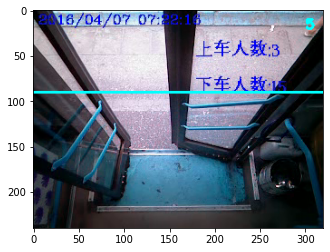

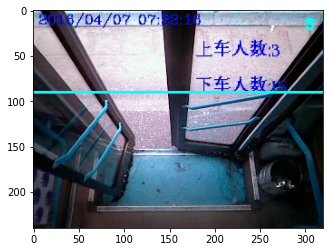

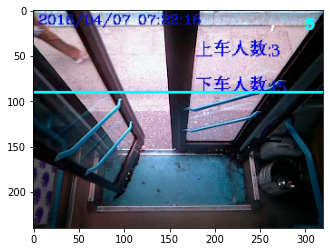

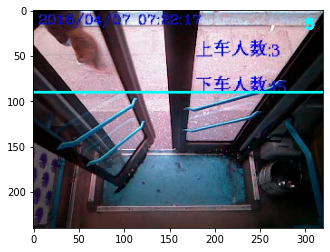

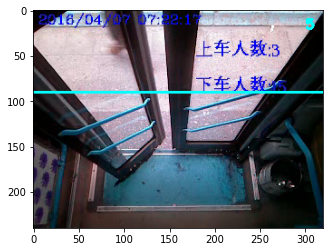

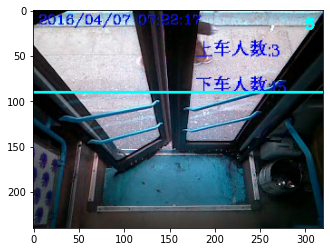

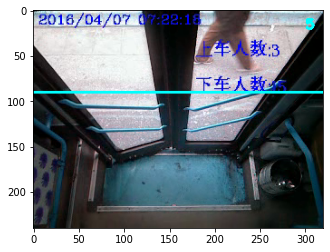

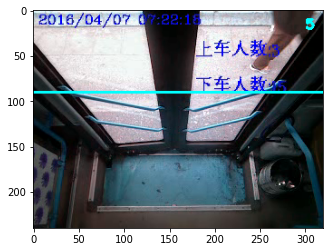

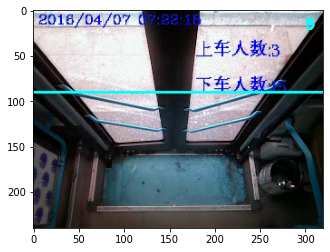

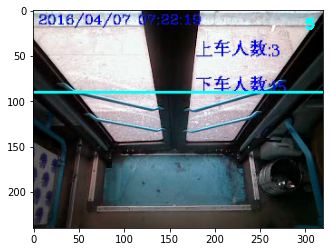

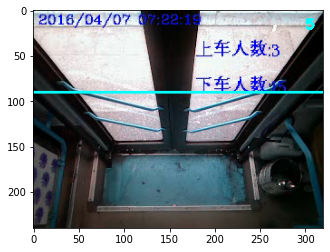

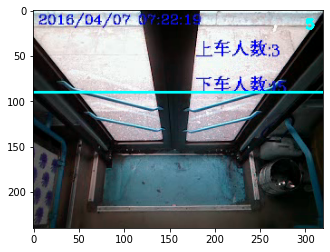

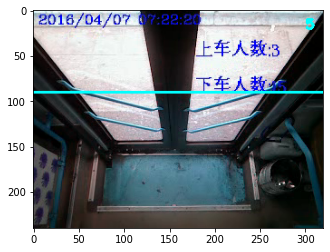

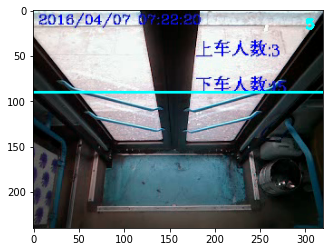

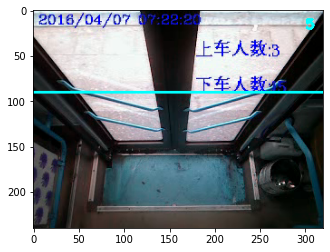

In [82]:
from sort import *
mot_tracker = Sort()
# capture = cv2.VideoCapture('2016_04_07_08_15_14BackColor.avi')
capture = cv2.VideoCapture('/content/darkflow/test_videos/crowd/2016_04_07_07_22_10BackColor.avi_red.avi')
# capture = cv2.VideoCapture('people-capture.mp4')

ret, frame = capture.read()
frame_height,frame_width,_ = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('people.avi',fourcc, 15, (frame_width,frame_height))

mem = {}
ret = True
count = 0
counter = 0
previous = {}
while(ret):
  ret, frame = capture.read()
  if(ret):
    result = tfnet.return_predict(frame)

    dets = []
    if len(result) > 0:
        # loop over the indexes we are keeping
        for res in result:
          if(res['label']=='person'):
            (x1,y1)=(res['topleft']['x'], res['topleft']['y'])
            (x2,y2)=(res['bottomright']['x'], res['bottomright']['y'])
            dets.append([x1, y1, x2, y2, res['confidence']])
    dets = np.asarray(dets)
    tracks = mot_tracker.update(dets)

    boxes = []
    indexIDs = []
    c = []
    previous = mem.copy()
    mem = {}
    for track in tracks:
      boxes.append([track[0], track[1], track[2], track[3]])
      indexIDs.append(int(track[4]))
      mem[indexIDs[-1]] = boxes[-1]

    if len(boxes) > 0:
      i = int(0)
      for box in boxes:
        # extract the bounding box coordinates
        (x, y) = (int(box[0]), int(box[1]))
        (w, h) = (int(box[2]), int(box[3]))

        # draw a bounding box rectangle and label on the image
        # color = [int(c) for c in COLORS[classIDs[i]]]
        # cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

        color = [int(c) for c in COLORS[indexIDs[i] % len(COLORS)]]
        cv2.rectangle(frame, (x, y), (w, h), color, 2)
        # print(indexIDs)
        if indexIDs[i] in previous:
          previous_box = previous[indexIDs[i]]
          (x2, y2) = (int(previous_box[0]), int(previous_box[1]))
          (w2, h2) = (int(previous_box[2]), int(previous_box[3]))
          p0 = (int(x + (w-x)/2), int(y + (h-y)/2))
          p1 = (int(x2 + (w2-x2)/2), int(y2 + (h2-y2)/2))
          cv2.line(frame, p0, p1, color, 10)
          if intersect(p0, p1, line[0], line[1]):
            # print(i)
            # print(np.sum(np.square(np.array(p1)-np.array(p0))))
            # print(indexIDs[i])
            # if(np.sum(np.square(np.array(p1)-np.array(p0)))>25):
              counter += 1

        # text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        # text = "{}".format(indexIDs[i])
        # cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        i += 1

    # draw line
    cv2.line(frame, line[0], line[1], (0, 255, 255), 2)

    # draw counter
    cv2.putText(frame, str(counter), (300,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
    # counter += 1


    # if(len(result)>0):
      # frame = bounbox(frame,result)
    out.write(frame)
    if(count%10==0):
      plt.imshow(frame)
      plt.show()
    count+=1

  # if(count>50):
    # ret = False

capture.release()
out.release()

In [39]:
p0

(212, 171)

In [40]:
p1

(211, 170)

2